In [401]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [402]:
img1 = Image.open('assets/parrots.png')
img2 = Image.open('assets/parrots_encoded.png')

Text(0.5, 1.0, 'Image 2')

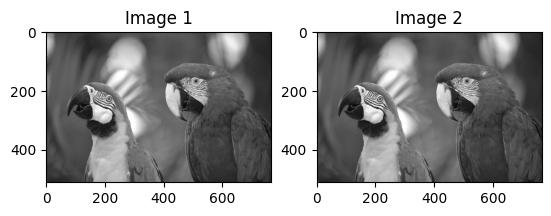

In [403]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Image 1')
axes[1].imshow(img1, cmap='gray')
axes[1].set_title('Image 2')

In [418]:
img1.size

(768, 512)

In [404]:
arr1 = np.array(img1).flatten()
arr2 = np.array(img2).flatten()

In [405]:
display(arr1)

array([112, 113, 116, ...,  59,  51,  52], shape=(393216,), dtype=uint8)

In [406]:
display(arr2)

array([112, 113, 116, ...,  59,  51,  52], shape=(393216,), dtype=uint8)

In [407]:
def get_lsb(n: int) -> int:
    '''
    An even number has the LSB 0 and an odd
    number has the LSB 1, this is the same
    as n % 2.
    '''
    return n % 2

In [408]:
encoded_arr = np.array(img2).flatten()

In [417]:
for i in range(len(arr1)):
    print(int(arr1[i])-int(arr2[i]), end='')

000-110-1-1010-1-1100-10100100010-111-10010-10000-1000-10-1-1-10-10-1-10-1-11100100-1010001-1-1-11-100010-100000-10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### **Method 1**
We can compare the LSBs of the first few intensities<br>
of the image manually and see which one is giving a<br>
valid message.

In [409]:
message1 = ''
message2 = ''

for i in range(0, 200, 8):                                                      # checking first 200 intensities
    byte1 = byte2 = 0
    for j in range(8):
        byte1 = byte1*2 + get_lsb(arr1[i+j])
        byte2 = byte2*2 + get_lsb(arr2[i+j])
    message1 += chr(byte1)
    message2 += chr(byte2)

print('Image 1:', message1)
print('Image 2:', message2)

Image 1: S9È2?«ïÁÐAÒ$­(©®ðÄÐ ihü
Image 2: Hello Bob! Ò$­(©®ðÄÐ ihü


### **Method 2**

Method 1 requires human intervention, so we can try something<br>
automatic. ASCII values are less than 128. This can be used<br>
to validate the bits obtained is ASCII or not.<br>
<br>
The image which encounters a bit greater than 127 first should<br>
contain lesser ASCII characters and is more likely to not be the<br>
encoded image.

In [410]:
def is_valid(n: int) -> bool:
    return n < 128

In [411]:
coded_image = None

for i in range(0, len(arr1), 8):
    byte1 = byte2 = 0
    for j in range(8):
        byte1 = byte1*2 + get_lsb(arr1[i+j])
        byte2 = byte2*2 + get_lsb(arr2[i+j])
    if not is_valid(byte1):
        print('Image 2 is coded.')
        coded_image = img2
        break
    elif not is_valid(byte2):
        print('Image 1 is coded.')
        coded_image = img1
        break

if coded_image == None:
    print('Both images are valid.')

Image 2 is coded.


In [412]:
coded_arr = np.array(coded_image).flatten()

message = ''

for i in range(0, len(arr1), 8):
    byte = 0
    for j in range(8):
        byte = byte*2 + get_lsb(coded_arr[i+j])
    if not is_valid(byte):
        break
    message += chr(byte)

print(bytes(message, encoding='ascii'))

b'Hello Bob!\x00'


### **Method 3**
In method 2, we were checking if the bytes are valid ASCIIs.<br>
But, not all ASCIIs are displayable characters and thus are<br>
not generally used in codes.<br>
<br>
Displayable characters start from SPACE at ASCII value 32 and<br>
end at DEL at ASCII value 127.

In [413]:
coded_arr = None

def is_displayable(n: int) -> bool:
    return n < 127 and n > 31

for i in range(0, len(arr1), 8):
    byte1 = byte2 = 0
    for j in range(8):
        byte1 = byte1*2 + get_lsb(arr1[i+j])
        byte2 = byte2*2 + get_lsb(arr2[i+j])
    if not is_displayable(byte1):
        print('Image 2 is coded.')
        coded_arr = img2
        break
    elif not is_displayable(byte2):
        print('Image 1 is coded.')
        coded_arr = img1
        break

if coded_arr == None:
    print('Both images are displayable.')

Image 2 is coded.


In [414]:
coded_arr = np.array(coded_image).flatten()

message = ''

for i in range(0, len(arr1), 8):
    byte = 0
    for j in range(8):
        byte = byte*2 + get_lsb(coded_arr[i+j])
    if not is_displayable(byte):
        break
    message += chr(byte)

print(bytes(message, encoding='ascii'))

b'Hello Bob!'
